<a href="https://colab.research.google.com/github/SafiyyahKazim/Google-COLAB/blob/master/911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. the instructor will provide a rnage of questions to answer and you should use your knowledge to complte them as a team.

Safiyyah Kazim, Sarah May, MJ C, Ariana Bhigroog

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/data/911.csv")

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


What are the five most common reasons for calling 911?

What are the top 5 zipcodes that are called the most?

Addresses with more than five calls

Most common hour of the day

Least common township with calls




What are the five most common reasons for calling 911?
Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012

In [ ]:
data['title'].value_counts().head()


Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

What are the top 5 zipcode that are caled the most?
19401.0
19464.0
19403.0
19446.0
19406.0


In [ ]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

least township with calls
lehigh county - 30 calls

In [ ]:
data['twp'].value_counts().tail(1)

LEHIGH COUNTY    30
Name: twp, dtype: int64

Addresses with more than 5 calls:
SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232

In [ ]:
addmorethan5 = data['addr'].value_counts().head()

In [ ]:
addmorethan5

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64

In [ ]:
data['addr']=='MAIN ST & OLD SUMNEYTOWN PIKE'

0        False
1        False
2        False
3        False
4        False
         ...  
99487    False
99488    False
99489    False
99490    False
99491    False
Name: addr, Length: 99492, dtype: bool

In [ ]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Fire: UNCONSCIOUS SUBJECT              1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
Name: title, Length: 110, dtype: int64

In [ ]:
data['title'].nunique()

110

In [ ]:
data['Department']=data['title'].apply(lambda title:title.split(':')[0])

In [ ]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[1])
# THE ZERO IS THE POSTIONAL AGRUEMENT

In [ ]:
data['Reason'].value_counts()

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
                          ...  
 POLICE INFORMATION           2
 ELECTROCUTION                2
 ACTIVE SHOOTER               2
 BOMB DEVICE FOUND            1
 DISABLED VEHICLE             1
Name: Reason, Length: 81, dtype: int64

Create a chart to show time where each Department is called the most

In [ ]:
type(data['timeStamp'].iloc[0])

str

In [ ]:
data['timeStamp']= pd.to_datetime(data['timeStamp'])

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:"Fri",5:'Sat',6:'Sun'}

In [ ]:
# convert strings in 'timeStamp' to datetime object

data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'])

pandas.core.series.Series

In [ ]:
# pull specific attributes from datetime object

data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
# map hours to hour of day

dmap = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'11',
        12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',
        21:'21',22:'22',23:'23'}
desired_order_list = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
data['Hour'] = data['Hour'].map(dmap)

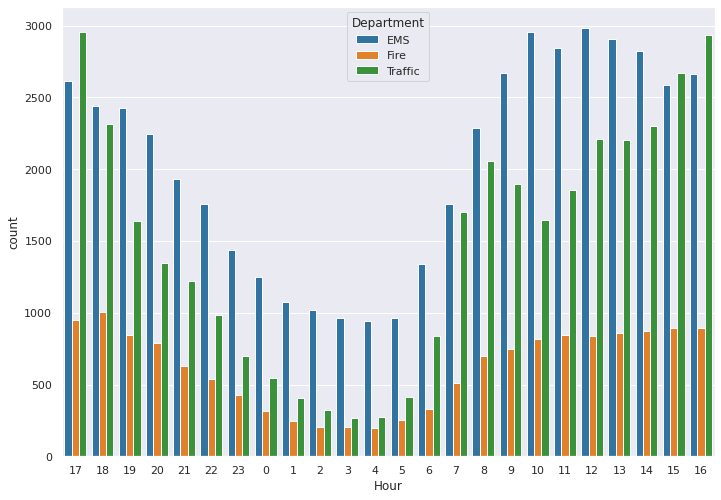

In [ ]:
sns.countplot(x='Hour',data=data,hue='Department',palette="tab10")

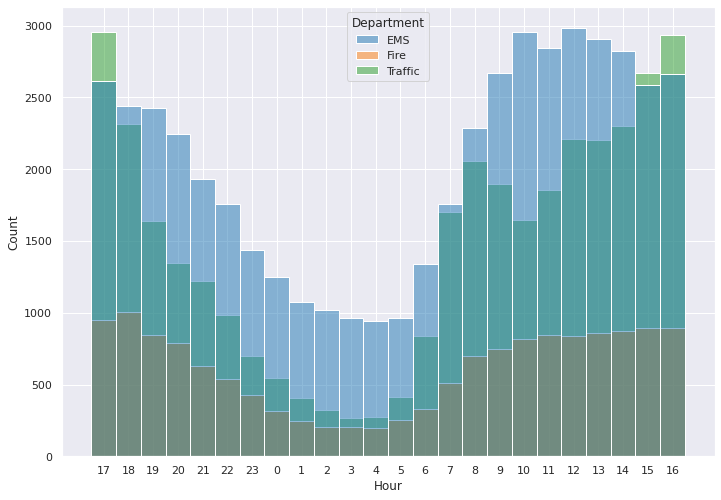

In [ ]:
sns.histplot(x='Hour',data=data,hue='Department',palette="tab10")